In [1]:
import numpy as np
import pandas as pd

from utils import load_parquet_to_df_list, z_normalize
from approximation.paa import PAA
from discretization.sax.sax import SAX
from information_embedding_cost.kullback_leibler_divergence import _compute_raw_histogram, _compute_symbolic_histogram, EqualWidthBinning, QuantileBinning

In [2]:
# load time series dataset into dataframe and z-normalize it
path = "../../../0_data/UCRArchive_2018/SwedishLeaf/train"
df_list = load_parquet_to_df_list(path)

# concatenate all time series to one dataframe, because they all have the same length
df_norm = pd.concat([z_normalize(df["signal"].to_frame()) for df in df_list], axis=1)
df_norm

,signal,signal,signal,signal,signal,signal,signal,signal,signal,signal,...,signal,signal,signal,signal,signal,signal,signal,signal,signal,signal
0,2.223633,1.879365,1.737821,1.849911,1.272420,1.855131,1.980311,1.256096,2.372685,1.757239,...,2.083123,1.895428,2.103342,1.105336,2.400193,1.561270,1.831127,2.017808,1.480454,2.029774
1,2.058567,1.733153,1.708888,1.756304,1.242152,1.699672,1.945595,1.177800,2.214034,1.623284,...,1.873362,1.724198,2.002517,0.874770,2.306958,1.396646,1.756485,1.900499,1.501426,1.937142
2,1.849589,1.579823,1.559112,1.599822,1.160121,1.447596,1.994798,1.032340,1.920566,1.469904,...,1.596348,1.560467,1.773882,0.711361,2.077942,1.031708,1.585476,1.717914,1.363446,1.747168
3,1.642328,1.402389,1.392660,1.426092,1.058091,1.250063,1.917555,0.878520,1.678298,1.317046,...,1.354441,1.409476,1.510552,0.666357,1.849518,0.750588,1.390242,1.498596,1.147401,1.588045
4,1.438219,1.257130,1.149077,1.273384,1.028827,1.098138,1.882779,0.893563,1.437475,1.163565,...,1.115365,1.220959,1.250514,0.498493,1.635240,0.427466,1.208922,1.317637,0.910140,1.434243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1.345195,1.162620,1.002372,1.193060,0.755275,1.037431,1.595726,0.942026,1.364450,1.123809,...,1.030905,1.450236,1.166254,0.534385,1.392409,0.394340,1.144440,1.204545,0.990679,1.285692
124,1.547908,1.314745,1.222534,1.343649,0.835097,1.199133,1.534958,0.956829,1.589209,1.274539,...,1.298884,1.506406,1.380864,0.653251,1.563047,0.703115,1.270413,1.377471,0.821239,1.452826
125,1.760490,1.500432,1.344060,1.516737,0.896891,1.402509,1.692896,1.077517,1.821819,1.428121,...,1.538491,1.654023,1.604449,0.715053,1.830966,1.022441,1.455076,1.591168,1.050893,1.625392
126,1.970141,1.657326,1.589952,1.672155,1.032240,1.634548,1.739579,1.112765,2.098101,1.582936,...,1.811339,1.727622,1.831709,0.871126,2.082068,1.330447,1.624659,1.772116,1.288864,1.822252


In [3]:
alphabet_size = 7
window_size = 5

sax = SAX(alphabet_size)
equi_width_binning = EqualWidthBinning()
quantile_binning = QuantileBinning()

df_raw_prob_distr = _compute_raw_histogram(df_norm, sax, equi_width_binning)
df_raw_prob_distr

,0,1,2,3,4,5,6,7,8,9,...,489,490,491,492,493,494,495,496,497,498
a,0.351562,0.156250,0.109375,0.148437,0.171875,0.179687,0.156250,0.148437,0.328125,0.132813,...,0.265625,0.179687,0.273437,0.101563,0.250000,0.257812,0.117188,0.312500,0.070313,0.156250
b,0.179687,0.109375,0.156250,0.125000,0.109375,0.210937,0.140625,0.140625,0.164062,0.132813,...,0.179687,0.242187,0.148437,0.140625,0.187500,0.218750,0.164062,0.148437,0.148437,0.195312
c,0.109375,0.156250,0.234375,0.226562,0.117188,0.101563,0.195312,0.117188,0.132813,0.179687,...,0.140625,0.179687,0.125000,0.242187,0.148437,0.218750,0.195312,0.132813,0.250000,0.218750
d,0.117188,0.257812,0.187500,0.171875,0.132813,0.132813,0.187500,0.179687,0.132813,0.218750,...,0.132813,0.140625,0.140625,0.304687,0.148437,0.085938,0.179687,0.101563,0.226562,0.117188
e,0.078125,0.117188,0.148437,0.125000,0.273437,0.148437,0.125000,0.265625,0.117188,0.132813,...,0.093750,0.085938,0.109375,0.125000,0.179687,0.062500,0.156250,0.140625,0.148437,0.109375
f,0.085938,0.101563,0.093750,0.101563,0.140625,0.085938,0.085938,0.101563,0.062500,0.109375,...,0.085938,0.117188,0.164062,0.039063,0.039063,0.078125,0.093750,0.085938,0.093750,0.101563
g,0.078125,0.101563,0.070313,0.101563,0.054688,0.140625,0.109375,0.046875,0.062500,0.093750,...,0.101563,0.054688,0.039063,0.046875,0.046875,0.078125,0.093750,0.078125,0.062500,0.101563


In [4]:
df_paa = PAA(window_size).transform(df_norm)
df_symbolic_prob_distr = _compute_symbolic_histogram(df_paa, df_norm, window_size, sax, None)
df_symbolic_prob_distr

,signal,signal,signal,signal,signal,signal,signal,signal,signal,signal,...,signal,signal,signal,signal,signal,signal,signal,signal,signal,signal
a,0.153846,0.192308,0.153846,0.153846,0.192308,0.115385,0.153846,0.153846,0.153846,0.192308,...,0.115385,0.115385,0.153846,0.192308,0.153846,0.115385,0.192308,0.115385,0.153846,0.115385
b,0.230769,0.076923,0.192308,0.153846,0.115385,0.269231,0.153846,0.192308,0.192308,0.153846,...,0.230769,0.230769,0.192308,0.076923,0.192308,0.269231,0.153846,0.230769,0.153846,0.230769
c,0.153846,0.153846,0.115385,0.153846,0.076923,0.076923,0.153846,0.038462,0.153846,0.076923,...,0.115385,0.153846,0.115385,0.153846,0.153846,0.076923,0.115385,0.115385,0.153846,0.192308
d,0.076923,0.192308,0.153846,0.153846,0.076923,0.115385,0.192308,0.115385,0.076923,0.192308,...,0.153846,0.076923,0.153846,0.153846,0.038462,0.192308,0.076923,0.153846,0.192308,0.038462
e,0.076923,0.115385,0.038462,0.076923,0.115385,0.076923,0.038462,0.153846,0.115385,0.076923,...,0.076923,0.115385,0.038462,0.192308,0.153846,0.076923,0.153846,0.076923,0.038462,0.115385
f,0.115385,0.115385,0.192308,0.153846,0.307692,0.153846,0.076923,0.230769,0.115385,0.153846,...,0.115385,0.115385,0.115385,0.115385,0.115385,0.115385,0.115385,0.153846,0.115385,0.115385
g,0.192308,0.153846,0.153846,0.153846,0.115385,0.192308,0.230769,0.115385,0.192308,0.153846,...,0.192308,0.192308,0.230769,0.115385,0.192308,0.153846,0.192308,0.153846,0.192308,0.192308


In [5]:
from scipy.stats import entropy

np.average(entropy(df_raw_prob_distr, df_symbolic_prob_distr))

0.2702657139402427

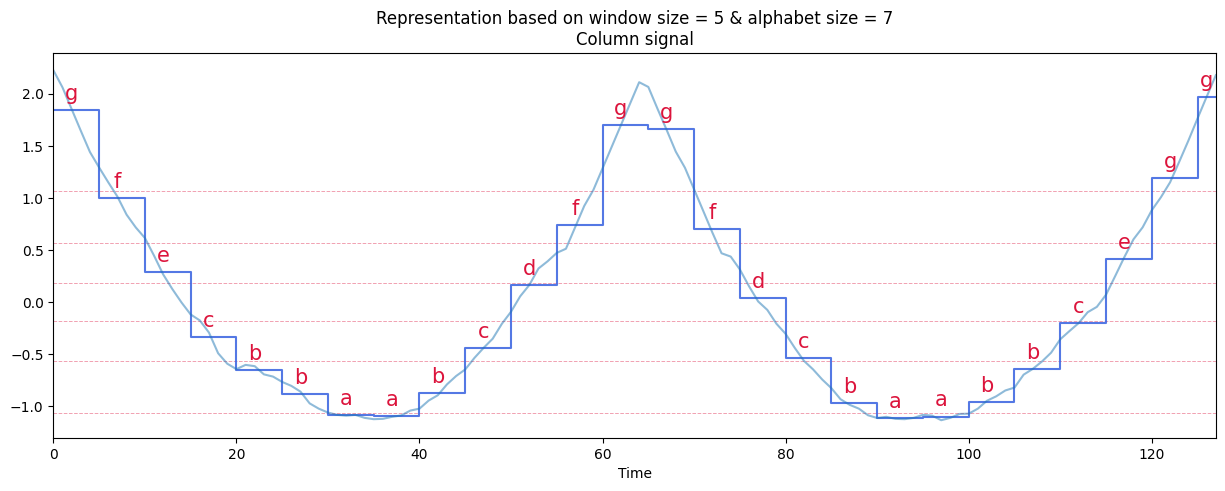

In [6]:
from discretization.sax.graphics import plot_paa_sax_symbols

df_sax = sax.transform(df_paa)
# PAA representation with respective SAX symbols of intervals
plot_paa_sax_symbols(df_norm, df_paa, df_sax, sax.breakpoints, sax.alphabet_size, window_size, num_column=0)